# Sprint 深層学習スクラッチ ニューラルネットワーク

In [71]:
import numpy as np
from fractions import Fraction

from sklearn.model_selection import train_test_split
from keras.datasets import mnist

import tensorflow as tf

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [72]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

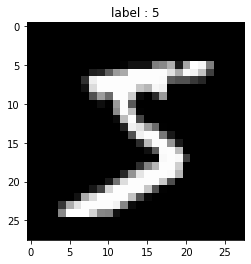

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

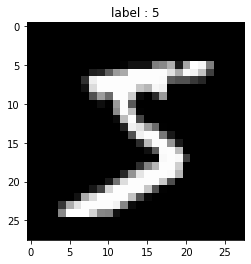

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [74]:
index = 0
image = X_train[index].reshape(28,28)

image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

In [75]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [82]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


In [77]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [8]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pass
        return

In [9]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [10]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([3, 3, 0, 8, 2, 1, 8, 2, 0, 3, 9, 5, 2, 0, 8, 7, 5, 2, 8, 8],
      dtype=uint8))


## 【問題1】重みの初期値を決めるコードの作成

1. ニューラルネットワークの各層の重みの初期値を決めるコードを作成する。
    * 重みの初期値はガウス（正規）分布による単純な初期化を行う。
    * バイアスに関しても同様
    * サンプルコードの標準偏差の値sigmaはハイパーパラメータ。
    

In [15]:
n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
# W1: (784, 400)

#################
# he_initialization = np.random.randn(size_l, size_l_1) * np.sqrt(2/size_l_1)
# xavier_initialization = np.random.randn(size_l, size_l_1) * np.sqrt(1/size_l_1)
# Xavier initialization which considers the size of the network(number of input and output units) while initializing weights.
#################

## 【問題2】フォワードプロパゲーションの実装

1. 三層のニューラルネットワークの**フォワードプロパゲーション**を作成する。
    * batch_size = 20 # バッチサイズ
    * n_features = 784 # 特徴量の数
    * n_nodes1 = 400 # 1層目のノード数
    * n_nodes2 = 200 # 2層目のノード数
    * n_output = 10 # 出力のクラス数（3層目のノード数）


In [58]:
def input_sum(inputs, weights):
    """
    入力和を返す関数
    """

def sigmoid(A):
    # return Fraction(1, 1 + np.exp(A))
    return 1 / np.exp(A)

def hyper_tan(A):
    answer = (np.exp(A)-np.exp(A)) /  (exp(A)+exp(A))
    return answer
    
def soft_max(A_3):
    '''
    A_3 = k番目のクラスにあたる前の層からのベクトル (batch_size, )
    '''
    # 入力値の中で最大値を取得
    max_value = np.max(A_3)
    
    # オーバーフロー対策として、最大値max_valueを引く。こうすることで値が小さくなる。
    exp_A_3 = np.exp(A_3 - max_value);
    sum_exp_A_3 = np.sum(exp_A_3)
    
    # answer = Fraction(exp_A_3, sum_exp_A_3)
    answer= exp_A_3 / sum_exp_A_3
    return answer

In [98]:
def forward_propagation(X, sigma=0.01, batch_size=20, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10):
    """
    順方向処理をする関数
    3層ニューラルネットワークを対象とした、入力から出力への処理（フォワード方向への処理）を実装

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      入力データ
    sigma : float
      ガウス（正規分布）分布の標準偏差（default=0.01）
    batch_size : int（default=20）
      バッチサイズ
    n_features : int（default=784）
      特徴量の数
    n_nodes1 : int（default=400）
    　1層目のノード数
    n_nodes2 : int（default=200）
    　2層目のノード数
    n_output : int（default=10）
    　出力のクラス数（3層目のノード数）
      
    Returns
    ----------
    final_output : 次の形のndarray, shape (batch_size, n_output)
    """    
    # バッチの抽出
    feature_vector = X[0][:batch_size, :]
    
    # 重みの初期化
    W1 = sigma * np.random.randn(n_features, n_nodes1)
    W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
    W3 = sigma * np.random.randn(n_nodes2, n_output)    
    # W1.shape : (784, 400)
    
    # バイアスの初期化
    bias_1 = np.full((n_nodes1, ), 0.01)
    bias_2 = np.full((n_nodes2, ), 0.01)
    bias_3 = np.full((n_output, ), 0.01)
    
    output_1 = np.matmul(feature_vector, W1) + bias_1
    # (batch_size, n_nodes1) = (batch_size, n_features) * (n_features, n_nodes1) + (n_nodes1, )
    output_1_mid = sigmoid(output_1)
    
    output_2 = np.matmul(output_1_mid, W2) + bias_2
    # (batch_size, n_nodes2) = (batch_size, n_nodes1) * (n_nodes1, n_nodes2) + (n_nodes2, )
    output_2_mid = sigmoid(output_2)
    
    output_3 = np.matmul(output_2_mid, W3) + bias_3
    # (batch_size, n_output) = (batch_size, n_nodes2) * (n_nodes2, n_output) + (n_output, )
    
    final_output = soft_max(output_3)
    # print(final_output.shape, type(final_output))
    return final_output

In [100]:
X = get_mini_batch[0]
final_output = forward_propagation(X)
final_output[0]

array([0.00480394, 0.00476361, 0.00595328, 0.00502035, 0.00520196,
       0.00430025, 0.00499428, 0.00522441, 0.00430011, 0.00544071])

## 【問題3】交差エントロピー誤差の実装

In [88]:
def cross_entropy_error(y, t, batch_size):
    delta = 1e-7
    return -(np.sum(t * np.log(y + delta))) / batch_size

In [99]:
final_output = forward_propagation(X)
batch_size = 20
y_train_sample = y_train_one_hot[:batch_size, :]

cross_entropy_error(final_output, y_train_sample, 20)

5.289953854249503

## 【問題4】バックプロパゲーションの実装
勾配 
$∂L∂Wi$ や $∂L∂Bi$ を求めるために、バックプロパゲーションを行う。

In [ ]:
corss_entropy_error = cross_entropy_error(final_output, y_train_sample, 20)
Z3 = final_output # ソフトマックス関数の出力 (batch_size, n_nodes2) : (20, 200)
Y = y_train_one_hot[:batch_size, :n_output] # 正解ラベル (batch_size, n_output) : (20, 10)
np.sum(Z3 - Y)

Z2 = output_2_mid # 2層目の活性化関数の出力 (batch_size, n_nodes2):(20, 200)

def back_propagation():


In [105]:
final_output.shape

(20, 10)

# 【訂正事項】

【問題4】の「3層目」の数式の説明欄
* 誤）$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)
* 正）$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_output)